# Analyzing Student Performance Factors

In this analysis, we will explore how personal, academic, and extracurricular factors influence students' performance. We will be using the [Student Performance Dataset](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset/data) by Rabie El Ekharoua (2020) from [Kaggle](https://www.kaggle.com/datasets).

While a full description is available on Kaggle, here’s a quick breakdown of the included data:

* Demographic Details: Age, Gender, Ethnicity and ParentalEducation
* Study Habits: StudyTimeWeekly, Absences and Tutoring
* Parental Involvement: ParentalSupport
* Extracurricular Activities: Extracurricular, Sports, Music and Volunteering
* Academic Performance: GPA
* Target Variable: Grade Class

All columns are **categorical**, except:
- `Age`
- `GPA`: Continuous (2.0–4.0)
- `StudyTimeWeekly`: Weekly study hours
- `Absences`: Total absences

**Gender**: `0` = Male, `1` = Female  
**Ethnicity**: `0` = Caucasian, `1` = African American, `2` = Asian, `3` = Other  
**ParentalEducation**: `0` = None, `1` = High School, `2` = Some College, `3` = Bachelor's, `4` = Higher  
**Tutoring**: `0` = No, `1` = Yes  
**ParentalSupport**: `0` = None, `1` = Low, `2` = Moderate, `3` = High, `4` = Very High  
**Sports**, **Music**, **Volunteering**: Each coded as `0` = No, `1` = Yes  
**GradeClass** (based on GPA):  
- `0` = A (≥ 3.5)  
- `1` = B (3.0–3.49)  
- `2` = C (2.5–2.99)  
- `3` = D (2.0–2.49)  
- `4` = F (< 2.0)

Run this notebook on [mybinder.org](https://mybinder.org/v2/gh/T-Naing/Jupyter/main?urlpath=%2Fdoc%2Ftree%2FEDA_student_performance%2FEDA_student_performance.ipynb)  
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/T-Naing/Jupyter/main?urlpath=%2Fdoc%2Ftree%2FEDA_student_performance%2FEDA_student_performance.ipynb)

In [1]:
# !pip install -q -r requirements.txt

Let's start by importing the essential libraries we'll need for data analysis and visualization.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000' # setting the figure background to be transparent
# matplotlib.rcParams['figure.dpi'] = 150        # Controls on-screen resolution
matplotlib.rcParams['savefig.dpi'] = 300       # Controls resolution when saving with savefig()
output_folder="./output/"

## Downloading the Dataset

Kaggle’s API requires authentication, so to keep things simple, we’ll use a ready-to-download copy of the dataset hosted on GitHub. This allows us to access it directly without needing API keys or account setup.

In [3]:
import os
os.makedirs('./data', exist_ok=True)
os.makedirs('./output', exist_ok=True)
file_path = "./data/Student_performance_data _.csv"

In [4]:
import urllib.request
url = "https://raw.githubusercontent.com/T-Naing/Jupyter/refs/heads/main/EDA_student_performance/data/Student_performance_data%20_.csv"

if 'Student_performance_data _.csv' not in os.listdir('./data'):
    urllib.request.urlretrieve(url, file_path)

Now that we've downloaded the dataset from GitHub, let's verify whether `Student_performance_data _.csv` exists in the `data` directory.

In [5]:
os.listdir('./data')

['.ipynb_checkpoints', 'Student_performance_data _.csv']

## Data Preparation and Cleaning

With the dataset in place, our next step is to inspect it for missing values, inconsistencies, or formatting issues. We'll ensure the data is clean and ready for analysis.

In [6]:
import pandas as pd
df_std_pfm=pd.read_csv(file_path)

In [7]:
df_std_pfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [8]:
df_std_pfm.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [9]:
df_std_pfm.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


> The dataset contains 15 columns and 2,393 records  
> There are no missing values in any column  
> Minimum and maximum values for all fields fall within expected ranges  

The dataset, contributed by **Mr. Rabie El Ekharoua**, appears to be clean and well-prepared. We’re ready to move on to the analysis phase.

## Exploratory Analysis and Visualization
### Analyzing GPA
To begin our analysis, we'll use a histogram to explore the distribution of GPA scores across all students. This will help us understand how academic performance is distributed throughout the dataset.


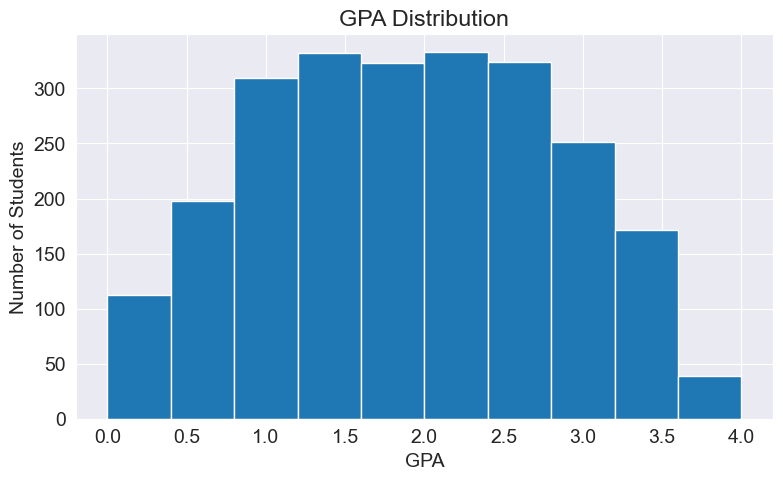

In [10]:
plt.hist(df_std_pfm.GPA)
plt.xlabel('GPA')
plt.ylabel('Number of Students')
plt.title('GPA Distribution');
plt.savefig(output_folder+'Histogram of GPA Distribution.png')
# plt.tight_layout()
# plt.show();

> The histogram shows that most students culster in GPA between 1.0 and 3.0.  
> The average GPA of the dataset is 1.91. 

Now, let’s explore study habits: `StudyTimeWeekly`, `Absences`, and `Tutoring`.

We'll visualize the relationships between:
- **GPA and StudyTimeWeekly** (scatterplot)
- **GPA and Absences** (scatterplot)
- **GPA across Tutoring groups** (boxplot)

### Analyzing Study Habits

#### 1. Correlation Between GPA and StudyTimeWeekly

In [42]:
corr, _ = stats.pearsonr(df_std_pfm['GPA'], 
                         df_std_pfm['StudyTimeWeekly'])
r_squared = corr ** 2

sns.regplot(x = df_std_pfm.GPA, 
            y = df_std_pfm.StudyTimeWeekly)

plt.title(f'Scatter Plot of GPA vs StudyTimeWeekly\nCorrelation: {corr:.2f}, R-squared: {r_squared:.2f}');
plt.savefig(output_folder +
            'Scatter Plot of GPA vs StudyTimeWeekly.png', 
            bbox_inches='tight')

AttributeError: 'dict' object has no attribute 'pearsonr'

> There is a very weak positive correlation of 0.18 between GPA and StudyTimeWeekly. This indicates that simply studying more isn't a guaranteed path to higher grades. Many other variables likely play a significant role in students' academic performance.

#### 2. Correlation Between GPA and Absences

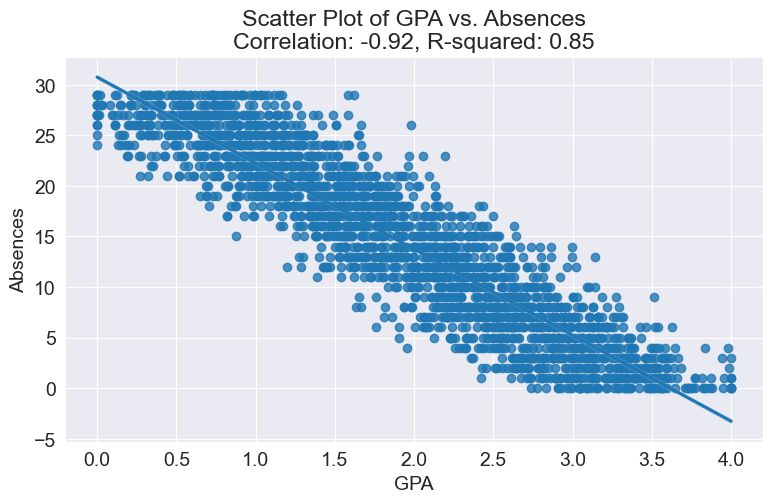

In [12]:
corr, _ = stats.pearsonr(df_std_pfm['GPA'], df_std_pfm['Absences'])
r_squared = corr ** 2

ax = sns.regplot(x=df_std_pfm.GPA,
                 y=df_std_pfm.Absences) 

plt.title(f'Scatter Plot of GPA vs. Absences\nCorrelation: {corr:.2f}, R-squared: {r_squared:.2f}');
plt.savefig(output_folder+'Scatter Plot of GPA vs. Absences.png')

>There is a very strong negative correlation (-0.92) between GPA and Absences, indicating that increased absences are closely associated with lower academic performance. This suggests that attending classes regularly plays a critical role in maintaining a high GPA.

#### 3. GPA Distribution by Tutoring Status

The `Tutoring` variable is binary:  
- `0` indicates no tutoring received  
- `1` indicates the student received tutoring  

We'll use a boxplot to compare GPA distributions across these two groups and examine whether access to tutoring has a visible effect on academic performance.

In [13]:
df_std_pfm.groupby('Tutoring')["GPA"].mean()

Tutoring
0    1.818968
1    2.108325
Name: GPA, dtype: float64

>Students who received tutoring (1) tend to have higher GPAs on average than those who did not (0).

##### Five-number Summary

In [14]:
feat_5_num = ['Median', 'Q1', 'Q3', 'IQR', 'Lower Whisker', 'Upper Whisker']

def cal_5_number(var):
    stat_5_num={}
    stat_5_num['Median'] = np.median(var) 
    stat_5_num['Q1']= np.percentile(var, 25) #Q1 is the median of the first half of the data
    stat_5_num['Q3']= np.percentile(var, 75)
    stat_5_num['IQR']= stat_5_num['Q3'] - stat_5_num['Q1']
    stat_5_num['Lower Whisker']= max(min(var), stat_5_num['Q1'] - 1.5 * stat_5_num['IQR'])
    stat_5_num['Upper Whisker']= min(max(var), stat_5_num['Q3'] + 1.5 * stat_5_num['IQR'])
    return stat_5_num

def print_5_number(five_num, title):
    print(f"== {title} ==")
    for feat in feat_5_num:
        print(f"{feat}:", five_num[feat])
    print()

== Tutoring: No ==
Median: 1.8186125604584331
Q1: 1.0720206708895483
Q3: 2.539722493917867
IQR: 1.4677018230283185
Lower Whisker: 0.0
Upper Whisker: 4.0

== Tutoring: Yes ==
Median: 2.0956913654305778
Q1: 1.3711850388917164
Q3: 2.864498066852598
IQR: 1.4933130279608815
Lower Whisker: 0.0
Upper Whisker: 4.0



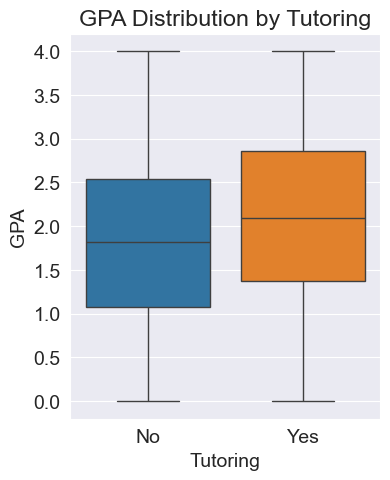

In [15]:
num5_no_tutoring = cal_5_number(
    df_std_pfm[df_std_pfm["Tutoring"]==0]["GPA"])

num5_tutoring = cal_5_number(
    df_std_pfm[df_std_pfm["Tutoring"]==1]["GPA"])

print_5_number(num5_no_tutoring,"Tutoring: No")
print_5_number(num5_tutoring,"Tutoring: Yes")

plt.figure(figsize=(4,5))
sns.boxplot(x='Tutoring', y='GPA', data=df_std_pfm, hue="Tutoring")
plt.xticks([0, 1], ['No', 'Yes'])
plt.gca().get_legend().remove()

plt.title("GPA Distribution by Tutoring")
plt.savefig(output_folder+'Boxplot of GPA Distribution by Tutoring.png')

>- Students who received tutoring tend to have higher GPAs, as shown by their higher median value (2.10 vs. 1.82).  
>- Although both groups share the same GPA extremes (0.0 to 4.0), the central 50% of the tutored group is distributed at higher performance levels, indicating stronger academic outcomes overall.  
>- This pattern suggests that tutoring may be positively associated with improved GPA, though additional factors should be considered before drawing conclusions about causation.


### Analyzing Extracurricular Activities

To explore how extracurricular involvement might relate to academic performance, we'll compare the **average GPA** across different categories of binary variables. These variables represent whether or not a student participates in certain activities such as Extracurricular, Sports, Music, or Volunteering.

We'll group students by each binary category (e.g., `0` = not involved, `1` = involved) and compute the **mean GPA** for each group. This allows us to observe whether participation is associated with any notable differences in academic performance.

In [16]:
binary_vars = ['Extracurricular', 'Sports', 'Music', 'Volunteering']

for var in binary_vars:
    mean = df_std_pfm.groupby(var)['GPA'].mean()
    print(f'{var} mean:')
    print(f'{mean.index[0]}: {mean[0]}')
    print(f'{mean.index[1]}: {mean[1]}')
    print(f'Mean difference: {mean[1]-mean[0]}')
    print()

Extracurricular mean:
0: 1.8383155830380276
1: 2.0153567624218045
Mean difference: 0.17704117938377695

Sports mean:
0: 1.871239565439244
1: 1.9863808816805857
Mean difference: 0.11514131624134172

Music mean:
0: 1.872969212784584
1: 2.0416640729568982
Mean difference: 0.16869486017231416

Volunteering mean:
0: 1.9048989649017978
1: 1.9130886246804826
Mean difference: 0.008189659778684799



#### GPA and Extracurricular Involvement

>- **Extracurricular Activities**: Students who participate have a noticeably higher average GPA (2.02 vs. 1.84), showing the largest difference, 0.18, among the categories.  
>- **Music**: Involvement in music is also associated with a higher GPA (2.04 vs. 1.87), suggesting a potential link between musical engagement and academic performance.  
>- **Sports**: Students in sports demonstrate a modest GPA advantage (1.99 vs. 1.87), hinting at possible benefits of physical activity and discipline.  
>- **Volunteering**: The difference is minimal (1.91 vs. 1.90), indicating little to no observable effect on average GPA.

Overall, participation in structured extracurricular activities—especially general extracurriculars and music—appears to correlate with stronger academic outcomes.

In [17]:
for var in binary_vars:
    num5_no_tutoring = cal_5_number(
        df_std_pfm[df_std_pfm[var]==0]["GPA"])

    num5_tutoring = cal_5_number(
        df_std_pfm[df_std_pfm[var]==1]["GPA"])
    
    print_5_number(num5_no_tutoring,f"{var}: No")
    print_5_number(num5_tutoring,f"{var}: Yes")

== Extracurricular: No ==
Median: 1.8347494481922708
Q1: 1.1063066836746147
Q3: 2.5447628663405486
IQR: 1.438456182665934
Lower Whisker: 0.0
Upper Whisker: 4.0

== Extracurricular: Yes ==
Median: 2.009298479722319
Q1: 1.2836220775478306
Q3: 2.7192011567406125
IQR: 1.4355790791927818
Lower Whisker: 0.0
Upper Whisker: 4.0

== Sports: No ==
Median: 1.8784058449871115
Q1: 1.123979042428345
Q3: 2.618097845074108
IQR: 1.4941188026457632
Lower Whisker: 0.0
Upper Whisker: 4.0

== Sports: Yes ==
Median: 1.9488167865943389
Q1: 1.2858837071511262
Q3: 2.631058857299295
IQR: 1.3451751501481688
Lower Whisker: 0.0
Upper Whisker: 4.0

== Music: No ==
Median: 1.8714659014427095
Q1: 1.1466960797952552
Q3: 2.5896707308558047
IQR: 1.4429746510605495
Lower Whisker: 0.0
Upper Whisker: 4.0

== Music: Yes ==
Median: 1.9922988471433196
Q1: 1.2962034059148804
Q3: 2.8029469338939803
IQR: 1.5067435279791
Lower Whisker: 0.0
Upper Whisker: 4.0

== Volunteering: No ==
Median: 1.894172625941011
Q1: 1.1697239118132146

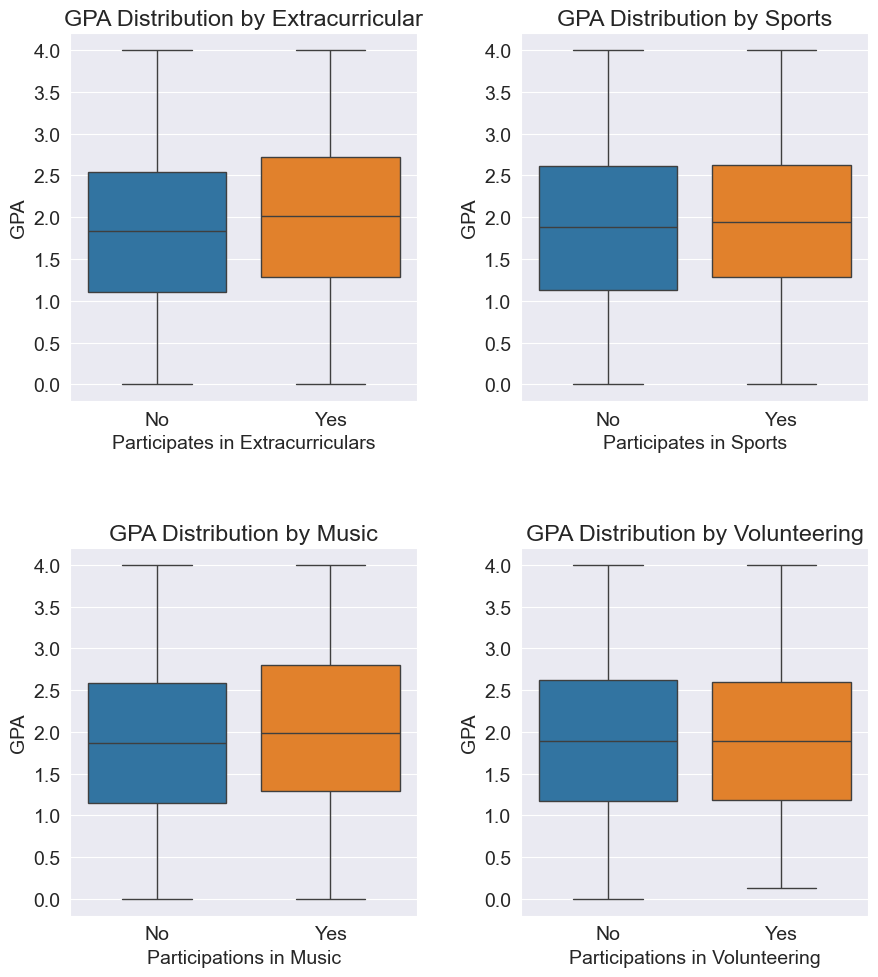

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(9, 10))

sns.boxplot(x='Extracurricular', y='GPA', data=df_std_pfm, hue="Extracurricular",ax = axs[0,0])
axs[0, 0].set_title('GPA Distribution by Extracurricular')
axs[0, 0].set_xlabel('Participates in Extracurriculars')
axs[0, 0].set_xticks([0, 1])
axs[0, 0].set_xticklabels(['No', 'Yes'])
axs[0, 0].get_legend().remove()

sns.boxplot(x='Sports', y='GPA', data=df_std_pfm, hue="Sports",ax = axs[0,1])
axs[0, 1].set_title('GPA Distribution by Sports')
axs[0, 1].set_xlabel('Participates in Sports')
axs[0, 1].set_xticks([0, 1])
axs[0, 1].set_xticklabels(['No', 'Yes'])
axs[0, 1].get_legend().remove()

sns.boxplot(x='Music', y='GPA', data=df_std_pfm, hue="Music",ax = axs[1,0])
axs[1, 0].set_title('GPA Distribution by Music')
axs[1, 0].set_xlabel('Participations in Music')
axs[1, 0].set_xticks([0, 1])
axs[1, 0].set_xticklabels(['No', 'Yes'])
axs[1, 0].get_legend().remove()

sns.boxplot(x='Volunteering', y='GPA', data=df_std_pfm, hue="Volunteering",ax = axs[1,1])
axs[1, 1].set_title('GPA Distribution by Volunteering')
axs[1, 1].set_xlabel('Participations in Volunteering')
axs[1, 1].set_xticks([0, 1])
axs[1, 1].set_xticklabels(['No', 'Yes'])
axs[1, 1].get_legend().remove()

plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.4)
# plt.title('GPA Distribution by Extracurricular Activities')
plt.savefig(output_folder+'GPA Distribution by Extracurricular Activities.png')


>- Participation in extracurricular activities appears to have the most notable positive association with GPA, followed by music and sports.
>- The middle 50% (interquartile range) of students involved in extracurriculars and music tend to be distributed at higher performance levels, indicating a potential benefit in academic outcomes.
>- Volunteering, based on this data, shows a more neutral impact, with minimal difference in GPA between those who participate and those who don’t.


### Analyzing Demographic Details
#### Ethnicity
In this dataset, ethnicity is represented numerically: 0 = Caucasian, 1 = African American, 2 = Asian, 3 = Other. We’ll start by evaluating the mean GPA for each ethnic group.

In [19]:
df_std_pfm.groupby('Ethnicity')['GPA'].mean()

Ethnicity
0    1.875905
1    1.946437
2    1.922125
3    1.947696
Name: GPA, dtype: float64

>At a glance, the differences are fairly small, but African American and Other ethnic groups have slightly higher average GPAs in this dataset. 

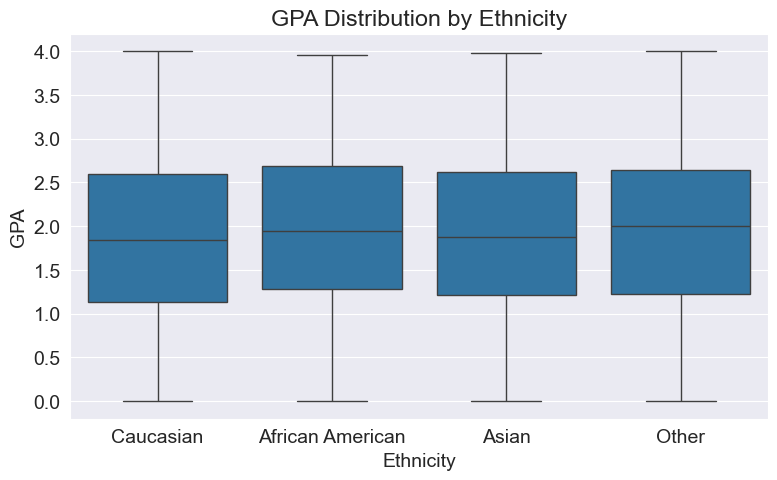

In [20]:
ethnicity = ['Caucasian','African American','Asian', 'Other']

plt.figure(figsize=(9,5))
sns.boxplot(x='Ethnicity', y='GPA', 
            data = df_std_pfm, )
plt.gca().set_xticks(range(len(ethnicity))) 
plt.gca().set_xticklabels(ethnicity) 
plt.xlabel("Ethnicity")
plt.title("GPA Distribution by Ethnicity")
plt.savefig(output_folder+"GPA Distribution by Ethnicity.png")

> The boxplot shows that GPA distributions across all ethnic groups are very similar. The African American and Other groups exhibit a slightly higher median, but all groups share the same upper and lower whiskers, indicating equal GPA ranges. Each group includes both top and bottom performers.

##### Ethnicity and Grade Classes

##### Distribution of Grade Classes by Ethnicity
To better understand the diversity within the student body, we examine the distribution of students across different ethnic groups and grade levels. 

In [21]:
df_ethnic=df_std_pfm.groupby('Ethnicity')[['GradeClass']].value_counts().reset_index(name='count')
df_ethnic=df_ethnic.pivot(index='GradeClass',columns='Ethnicity',values='count')

df_ethnic.rename(index={0.0: 'A (GPA >= 3.5)', 1.0:'B (3.0 <= GPA < 3.5)', 2.0: 'C (2.5 <= GPA < 3.0)',3.0:'D (2.0 <= GPA < 2.5)',4.0:'F (GPA < 2.0)'}, inplace=True)
df_ethnic.rename(columns={0: 'Caucasian', 1: 'African American', 2: 'Asian',3:'Other'}, inplace=True)
df_ethnic_T= df_ethnic.T

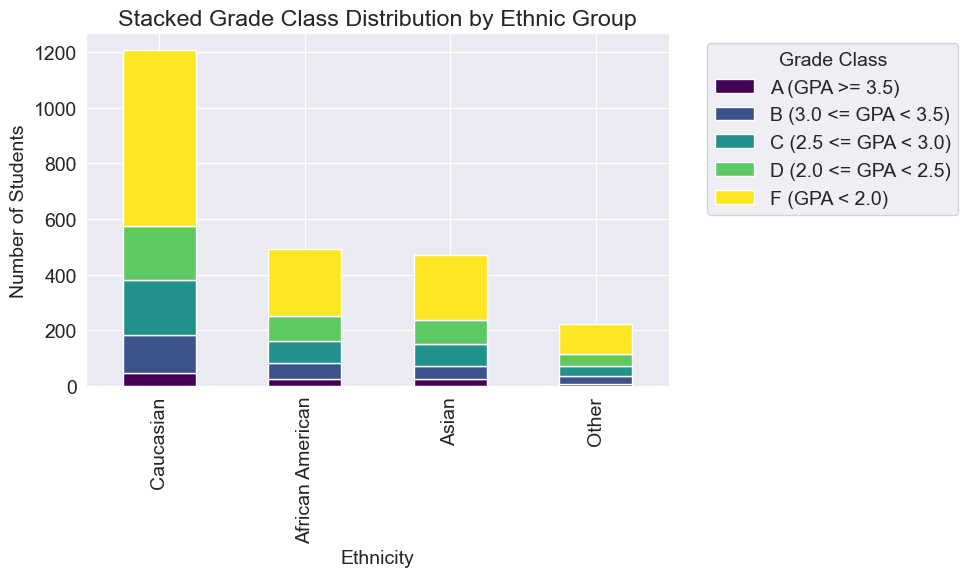

In [22]:
# Transpose to group by ethnicity on the x-axis
df_ethnic_T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title("Stacked Grade Class Distribution by Ethnic Group")
plt.xlabel("Ethnicity")
plt.ylabel("Number of Students")
plt.legend(title="Grade Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(output_folder+'Stacked Grade Class Distribution by Ethnic Group.png')


>This distribution reveals that Caucasian students represent the largest ethnic group in the dataset, followed by African American, Asian, and students categorized as Other. However, despite demographic differences, high academic achievement—as reflected in upper GradeClass standings—was relatively rare across all groups.

##### Normalized Distribution of Grade Classes by Ethnicity

Asian 0.0574468085106383
Caucasian 0.03893951946975974
Caucasian 0.5236122618061309
Other 0.47297297297297297


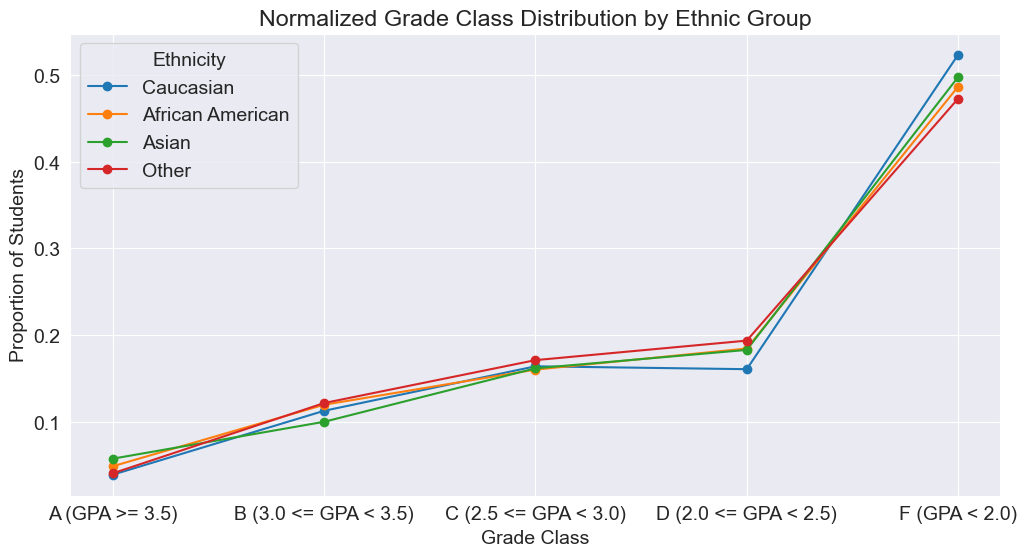

In [23]:
df_ethnic_norm = df_ethnic_T.div(df_ethnic_T.sum(axis=1), axis=0)
print(df_ethnic_norm['A (GPA >= 3.5)'].idxmax(), df_ethnic_norm['A (GPA >= 3.5)'].max())
print(df_ethnic_norm['A (GPA >= 3.5)'].idxmin(), df_ethnic_norm['A (GPA >= 3.5)'].min())
print(df_ethnic_norm['F (GPA < 2.0)'].idxmax(), df_ethnic_norm['F (GPA < 2.0)'].max())
print(df_ethnic_norm['F (GPA < 2.0)'].idxmin(), df_ethnic_norm['F (GPA < 2.0)'].min())
# print(df_ethnic_norm)
plt.figure(figsize=(12, 6))

for ethnicity in df_ethnic_norm.index:
    plt.plot(df_ethnic_norm.columns, df_ethnic_norm.loc[ethnicity],
             marker='o', label=ethnicity)

plt.title("Normalized Grade Class Distribution by Ethnic Group")
plt.xlabel('Grade Class')
plt.ylabel('Proportion of Students')
plt.legend(title='Ethnicity')
plt.savefig(output_folder+'Normalized Grade Class Distribution by Ethnic Group.png')
plt.show()

>- A relatively small proportion of students across all ethnic groups achieved a GPA of 3.5 or higher. Among them, Asian students had the highest representation in this top-performing category at approximately 6%, followed by African American, Other, and lastly Caucasian students. In fact, only about 4% of Caucasian students reached this grade level.
>- At the lower end of the performance spectrum—GPA below 2.0—Caucasian students represented the largest proportion, with over 52% of their group falling into this category. Conversely, students in the Other ethnic group had the lowest proportion in this performance band, at roughly 47%.
#### Gender

In [24]:
df_std_pfm.groupby('Gender')['GPA'].mean()

Gender
0    1.918679
1    1.894225
Name: GPA, dtype: float64

>On average, GPA performance is fairly similar between genders. 

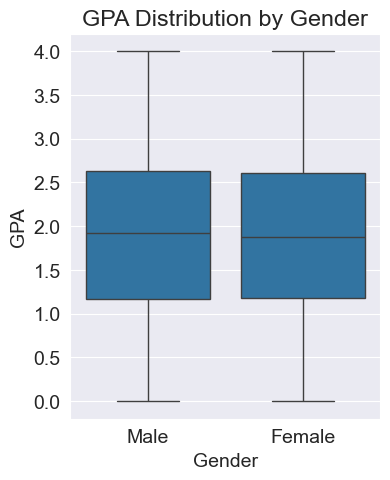

In [25]:
plt.figure(figsize=(4,5))
sns.boxplot(x='Gender', y='GPA', data=df_std_pfm)
plt.xticks([0, 1], ['Male', 'Female'])
plt.title("GPA Distribution by Gender")
plt.savefig(output_folder+'Boxplot of GPA Distribution by Gender.png')

> The boxplot reveals that GPA distributions across genders are quite similar. Both genders have both outperformer and low performer, middle 50% of both group perfrom similar.

Now we will analyze how gender is distributed across Grade Classes.

In [26]:
df_gender=df_std_pfm.groupby('Gender')[['GradeClass']].value_counts().reset_index(name='count')
df_gender=df_gender.pivot(index='GradeClass',columns='Gender',values='count')
# print(df_gender)
df_gender.rename(index={0.0: 'A (GPA >= 3.5)', 1.0:'B (3.0 <= GPA < 3.5)', 2.0: 'C (2.5 <= GPA < 3.0)',3.0:'D (2.0 <= GPA < 2.5)',4.0:'F (GPA < 2.0)'}, inplace=True)
df_gender.rename(columns={0: 'Male', 1: 'Female'},inplace=True)
df_gender_T= df_gender.T
# print(df_gender_T)

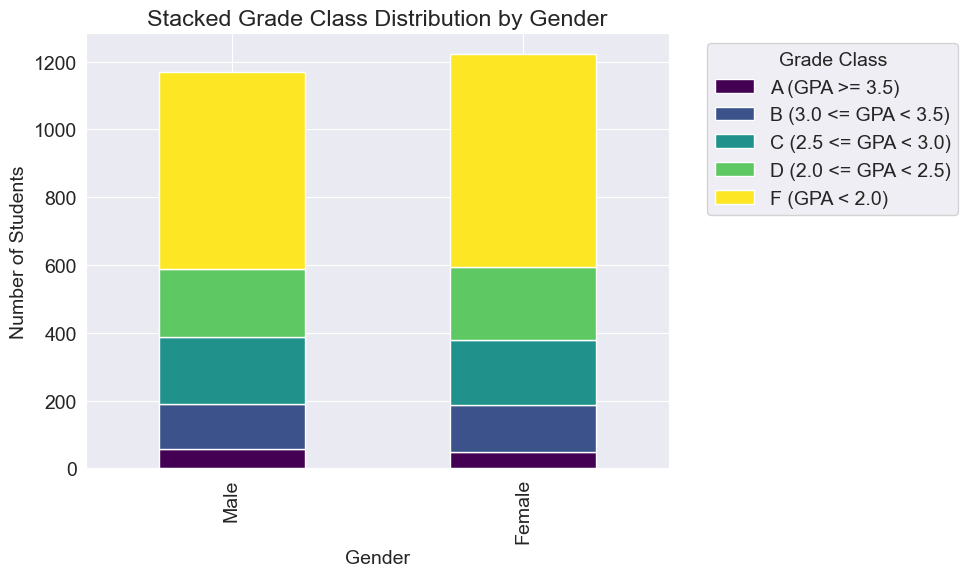

In [27]:
df_gender_T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title("Stacked Grade Class Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Students")
plt.legend(title="Grade Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
# print(df_gender_T)

>- There are more female students than male students in the dataset.
>- A larger proportion of male students achieved a Grade A (GPA ≥ 3.5) compared to females.
>- Conversely, a higher proportion of female students fell into the Grade F category (GPA < 2.0) compared to males.

Male 0.04957264957264957
Female 0.040098199672667756
Female 0.5147299509001637
Male 0.49743589743589745


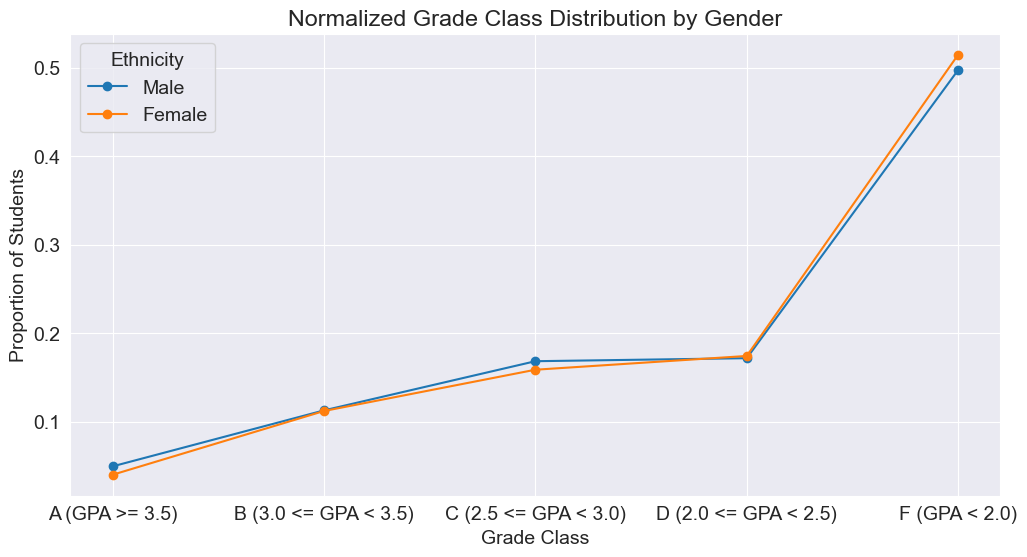

In [28]:
df_gender_norm = df_gender_T.div(df_gender_T.sum(axis=1), axis=0)
print(df_gender_norm['A (GPA >= 3.5)'].idxmax(), df_gender_norm['A (GPA >= 3.5)'].max())
print(df_gender_norm['A (GPA >= 3.5)'].idxmin(), df_gender_norm['A (GPA >= 3.5)'].min())
print(df_gender_norm['F (GPA < 2.0)'].idxmax(), df_gender_norm['F (GPA < 2.0)'].max())
print(df_gender_norm['F (GPA < 2.0)'].idxmin(), df_gender_norm['F (GPA < 2.0)'].min())
# print(df_ethnic_norm)
plt.figure(figsize=(12, 6))

for gender in df_gender_norm.index:
    plt.plot(df_gender_norm.columns, df_gender_norm.loc[gender],
             marker='o', label=gender)

plt.title("Normalized Grade Class Distribution by Gender")
plt.xlabel('Grade Class')
plt.ylabel('Proportion of Students')
plt.legend(title='Ethnicity')
plt.savefig(output_folder+'Normalized Grade Class Distribution by Ethnic Group.png')
plt.show()

>- Approximately 5% of male students achieved an A grade (GPA ≥ 3.5), compared to 4% of female students.
>- For the lowest grade category (F, GPA < 2.0), 51% of female students and 49% of male students fell into this bracket.

#### Age
##### GPA Grade Distributions Acroess Age Groups

In [29]:
df_std_pfm.groupby('Age')['GPA'].mean()

Age
15    1.898509
16    1.907534
17    1.927030
18    1.892101
Name: GPA, dtype: float64

>On average, GPA performance is fairly similar across all age group.

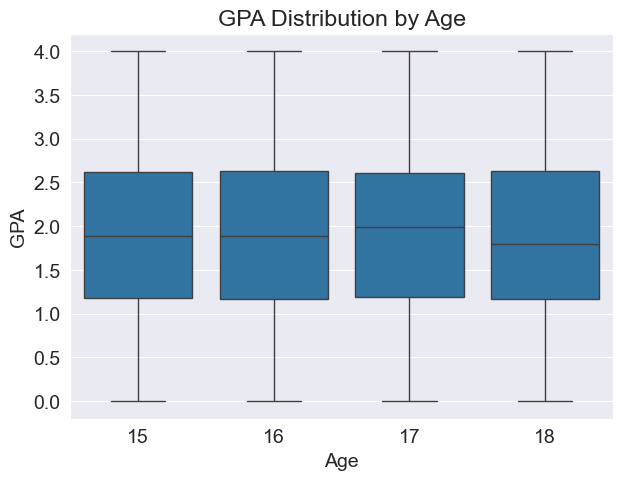

In [30]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Age', y='GPA', data=df_std_pfm)

plt.title("GPA Distribution by Age")
plt.savefig(output_folder+'Boxplot of GPA Distribution by Age.png')

>The boxplot indicates that GPA distributions are very similar across all age groups, with each group sharing the similar minimum and maximum GPA values. Notably, students aged 17 exhibit a slightly higher median GPA, suggesting a modest advantage in overall performance at that age. And students aged 18 exhibit a lower median GPA and 50% of the middle students have more spread meaning performance are most incosistent in this age.

In [31]:
df_age=df_std_pfm.groupby('Age')[['GradeClass']].value_counts().reset_index(name='count')
df_age=df_age.pivot(index='GradeClass',columns='Age',values='count')
# print(df_gender)
df_age.rename(index={0.0: 'A (GPA >= 3.5)', 1.0:'B (3.0 <= GPA < 3.5)', 2.0: 'C (2.5 <= GPA < 3.0)',3.0:'D (2.0 <= GPA < 2.5)',4.0:'F (GPA < 2.0)'}, inplace=True)
# df_gender.rename(columns={0: 'Male', 1: 'Female'},inplace=True)
df_age_T= df_age.T
# print(df_gender_T)

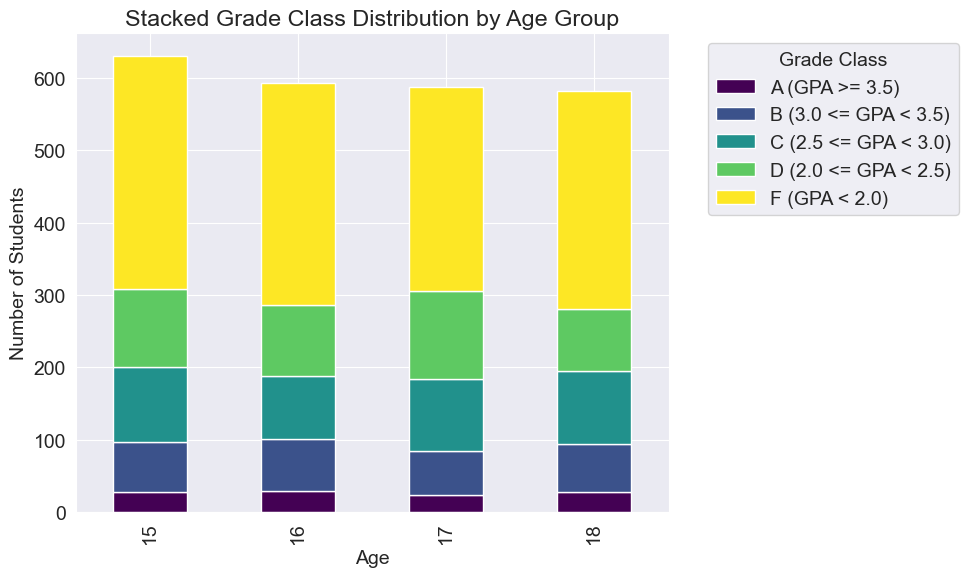

In [32]:
df_age_T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title("Stacked Grade Class Distribution by Age Group")
plt.xlabel("Age")
plt.ylabel("Number of Students")
plt.legend(title="Grade Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
# print(df_age_T)

> Students aged 15 comprise the largest group in the dataset, followed by those aged 16, 17, and 18.

16 0.048903878583473864
17 0.04088586030664395
16 0.5177065767284992
17 0.4787052810902896


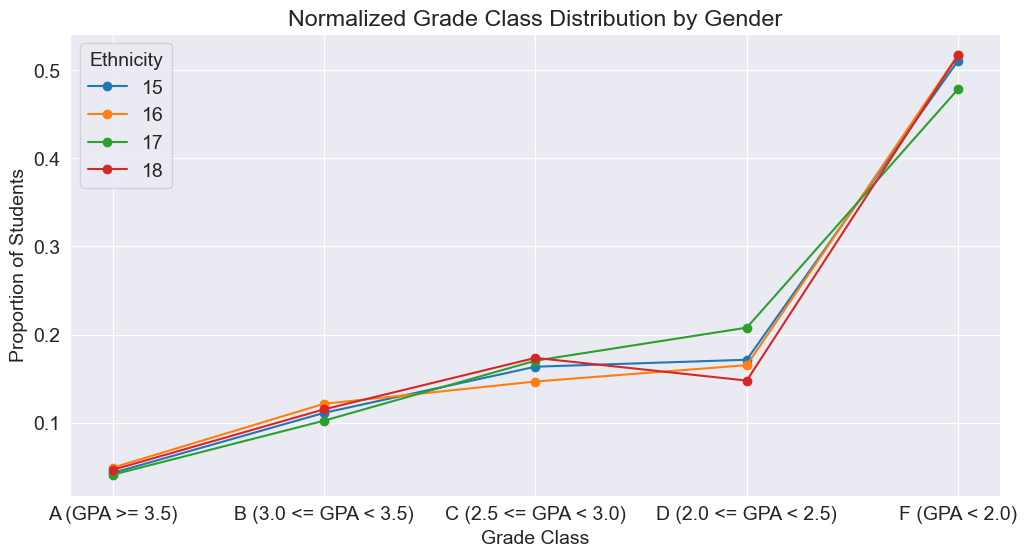

In [33]:
df_age_norm = df_age_T.div(df_age_T.sum(axis=1), axis=0)
print(df_age_norm['A (GPA >= 3.5)'].idxmax(), df_age_norm['A (GPA >= 3.5)'].max())
print(df_age_norm['A (GPA >= 3.5)'].idxmin(), df_age_norm['A (GPA >= 3.5)'].min())
print(df_age_norm['F (GPA < 2.0)'].idxmax(), df_age_norm['F (GPA < 2.0)'].max())
print(df_age_norm['F (GPA < 2.0)'].idxmin(), df_age_norm['F (GPA < 2.0)'].min())
# print(df_ethnic_norm)
plt.figure(figsize=(12, 6))

for age in df_age_norm.index:
    plt.plot(df_age_norm.columns, df_age_norm.loc[age],
             marker='o', label=age)

plt.title("Normalized Grade Class Distribution by Gender")
plt.xlabel('Grade Class')
plt.ylabel('Proportion of Students')
plt.legend(title='Ethnicity')
plt.savefig(output_folder+'Normalized Grade Class Distribution by Ethnic Group.png')
plt.show()

>- Students aged 16 have the highest proportion achieving a Grade A (GPA ≥ 3.5), at nearly 5%, while those aged 17 show the lowest, at around 4%.
>- When it comes to the lowest grade category (F, GPA < 2.0), students aged 17 fare better, with only 48% falling into this group—the lowest rate across all ages. In contrast, 52% of students aged 16 are in this category, marking the highest failure rate among the age groups.

#### Parental Education

In [34]:
df_std_pfm.groupby('ParentalEducation')['GPA'].mean()

ParentalEducation
0    1.893045
1    1.944022
2    1.929881
3    1.809082
4    1.815812
Name: GPA, dtype: float64

> Students whose parents have a high school education exhibit the highest average GPA, at approximately 1.94—outperforming all other parental education levels in the dataset.

In [35]:
# Map numeric codes to labels
edu_map = {
    0: 'None',
    1: 'High School',
    2: 'Some College',
    3: "Bachelor's",
    4: 'Higher'
}

# Apply the mapping to a new column (or overwrite the existing one if preferred)
df_std_pfm['ParentalEducationLabel'] = df_std_pfm['ParentalEducation'].map(edu_map)

In [36]:
p_edu = ['None','High School','Some College', 'Bachelor\'s','Higher' ]
from matplotlib.cbook import boxplot_stats
for edu_lvl in p_edu:    
    stats = boxplot_stats(df_std_pfm[df_std_pfm['ParentalEducationLabel'] == edu_lvl]['GPA'].dropna())[0]  # Get stats for first box plot
    print(edu_lvl)
    print("Median:", stats["med"])
    print("Q1:", stats["q1"])
    print("Q3:", stats["q3"])
    print("Lower Whisker:", stats["whislo"])
    print("Upper Whisker:", stats["whishi"])
    print()

None
Median: 1.8556669117535305
Q1: 1.1504457972956197
Q3: 2.6364677896967317
Lower Whisker: 0.0
Upper Whisker: 4.0

High School
Median: 1.9541030879548216
Q1: 1.240343253315053
Q3: 2.62742644850863
Lower Whisker: 0.0
Upper Whisker: 4.0

Some College
Median: 1.8919481333844268
Q1: 1.1848862019208082
Q3: 2.6691885990290425
Lower Whisker: 0.0
Upper Whisker: 4.0

Bachelor's
Median: 1.8558655731681932
Q1: 1.0249424246515755
Q3: 2.5320829290477533
Lower Whisker: 0.0
Upper Whisker: 3.8806400848697424

Higher
Median: 1.7117287756555737
Q1: 1.241568523884211
Q3: 2.417723440815106
Lower Whisker: 0.0
Upper Whisker: 3.812757187598897



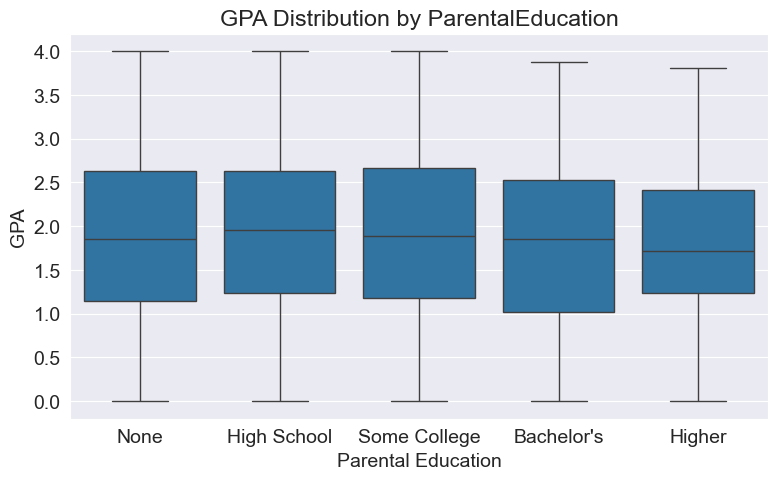

In [37]:
p_edu = ['None','High School','Some College', 'Bachelor\'s','Higher' ]

plt.figure(figsize=(9,5))
sns.boxplot(x='ParentalEducation', y='GPA', 
            data = df_std_pfm, )
plt.gca().set_xticks(range(len(p_edu))) 
plt.gca().set_xticklabels(p_edu) 
plt.xlabel("Parental Education")
plt.title("GPA Distribution by ParentalEducation")
plt.savefig(output_folder+"GPA Distribution by ParentalEducation.png")

>- Students whose parents had only a high school education exhibited the highest median GPA at 1.95, followed by those with some college education (1.89) and no formal education (1.86).
>- Conversely, students from bachelor’s and higher-degree backgrounds had slightly lower medians of 1.86 and 1.71, respectively. 
>- For the bachelor’s and higher groups, the upper whiskers in the GPA distribution fell just below the maximum GPA, indicating fewer top-scoring students.
>- This suggests that students from academically stronger families did not consistently outperform their peers in terms of peak GPA achievement.



In [46]:
df_pe_agg=df_std_pfm.groupby('ParentalEducation')[['GradeClass']].value_counts().reset_index(name='count')
df_pe_agg=df_pe_agg.pivot(index='GradeClass',columns='ParentalEducation',values='count')
df_pe_agg.rename(index={0.0: 'A (GPA >= 3.5)', 1.0:'B (3.0 <= GPA < 3.5)', 2.0: 'C (2.5 <= GPA < 3.0)',3.0:'D (2.0 <= GPA < 2.5)',4.0:'F (GPA < 2.0)'}, inplace=True)
df_pe_agg.rename(columns={0: 'None', 1: 'High School', 2: 'Some College',3:'Bachelor\'s',4:'Higher'}, inplace=True)
df_pe_agg_T= df_pe_agg.T
# df_pe_agg

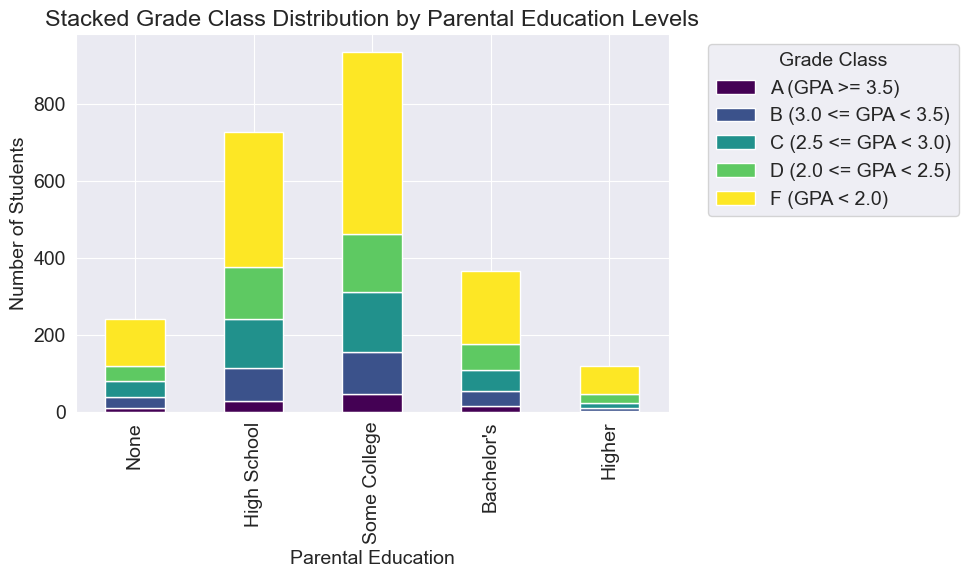

In [39]:
# Transpose to group by ethnicity on the x-axis
df_pe_agg_T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title("Stacked Grade Class Distribution by Parental Education Levels")
plt.xlabel("Parental Education")
plt.ylabel("Number of Students")
plt.legend(title="Grade Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(output_folder+'Stacked Grade Class Distribution by Parental Education Levels.png')

>- Students whose parents attended some college make up the largest group in the dataset, followed by those with high school, bachelor's, no formal education, and lastly, higher degrees.

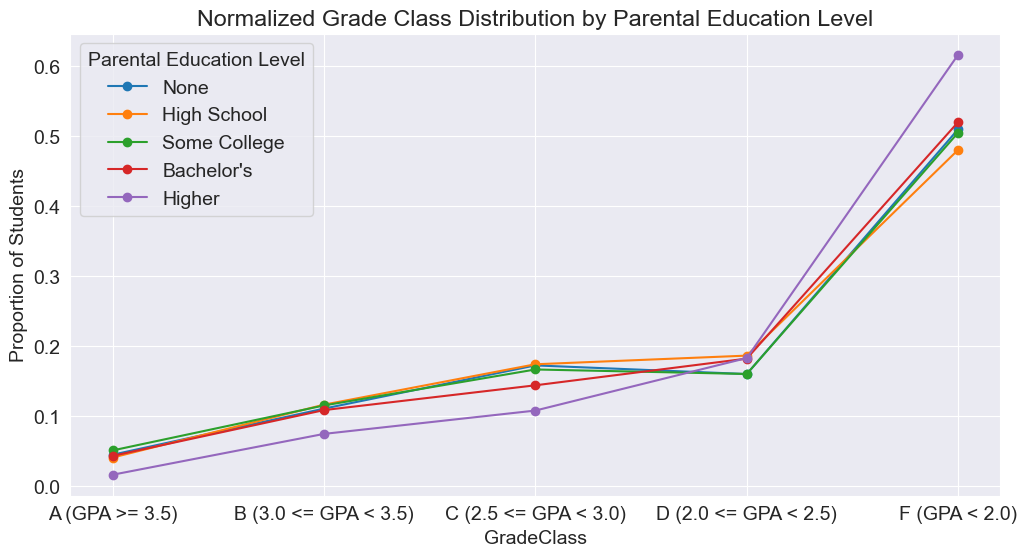

In [48]:
df_pe_normalized = df_pe_agg_T.div(df_pe_agg_T.sum(axis=1), axis=0)
# print(df_pe_normalized)
plt.figure(figsize=(12, 6))

for i in df_pe_normalized.index:
    plt.plot(df_pe_normalized.columns, df_pe_normalized.loc[i],
             marker='o', label=i)

plt.title("Normalized Grade Class Distribution by Parental Education Level")
plt.xlabel('GradeClass')
plt.ylabel('Proportion of Students')
plt.legend(title='Parental Education Level')
plt.savefig(output_folder+'Normalized Grade Class Distribution by Parental Education Level.png')
plt.show()


>- Interestingly, students whose parents attained a higher degree have the lowest proportion of A grades (1.7%) B grades (7.5%), and C grades(10.8%), and the highest proportion of F grades (61.7%).
>- Students whose parents completed some college education have the highest percentage of A grades at 5.1%.
>- Students whose parents finished high school show the lowest rate of F grades (48.1%),


### Analyzing  Parental Involvement

ParentalSupport
0    1.540128
1    1.755700
2    1.884246
3    2.042409
4    2.191545
Name: GPA, dtype: float64


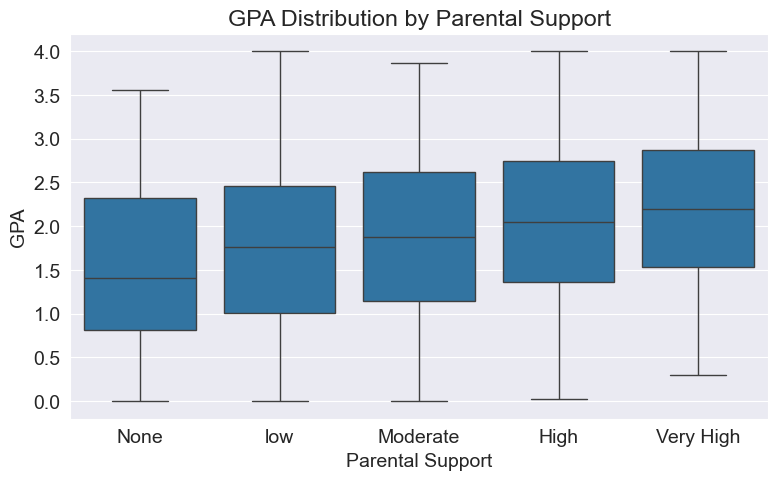

In [41]:
print(df_std_pfm.groupby('ParentalSupport')['GPA'].mean())
ps_lbl=['None','low','Moderate', 'High','Very High' ]
# plt.figure(figsize=(6,3),dpi=150)
plt.figure(figsize=(9,5))
sns.boxplot(x='ParentalSupport', y='GPA', 
            data = df_std_pfm, )
plt.gca().set_xticks(range(len(ps_lbl))) 
plt.gca().set_xticklabels(ps_lbl) 
plt.xlabel("Parental Support")
plt.title("GPA Distribution by Parental Support")
plt.savefig(output_folder+"GPA Distribution by Parental Support.png") 

>The boxplots provide compelling evidence that parental support significantly enhances student GPA. As the level of parental support increases, the median GPA rises, the spread of GPAs narrows, and the overall distribution shifts toward higher GPAs. 

### Summary
>- The analysis indicates that regular class attendance, access to tutoring, involvement in extracurricular activities (including music and sports), and strong parental support are all associated with improved academic performance.
>- On the other hand, increased weekly study time does not necessarily equate to higher grades—highlighting that how students study may matter more than how long.
>- The demographic variables such as age, gender, ethnicity do not appear to significantly influence on student performance. Interestingly, students whose parents have higher levels of education tend to show lower academic performance.